In [1]:
import pandas as pd
import sys
import os   
import yaml


In [2]:
'python 3.12.7'

'python 3.12.7'

In [3]:
sys.path.append(os.path.abspath(os.path.join('..')))

from src.helpers.config import ConfigHelper


config = ConfigHelper.instance('config')
sample_path = config.get('sample_path')

In [4]:
print(sample_path)

..\data\samplePoints.csv


In [5]:
      
def load_agb_csv(csv_path):
    """
    Load the agb CSV file with multiple fallback methods.
    
    Args:
        csv_path (str): Path to the CSV file
    
    Returns:
        pd.DataFrame: Loaded CSV data or empty DataFrame if failed
    """
    
    # Method 1: Try with semicolon separator
    try:
        csv_df = pd.read_csv(csv_path, encoding='utf-8-sig', sep=';', on_bad_lines='skip')
        print("✓ CSV loaded successfully with semicolon separator")
        return csv_df
    except Exception as e:
        print(f"Method 1 (semicolon) failed: {e}")
    
    # Method 2: Try with comma separator
    try:
        csv_df = pd.read_csv(csv_path, encoding='utf-8-sig', sep=',', on_bad_lines='skip')
        print("✓ CSV loaded successfully with comma separator")
        return csv_df
    except Exception as e:
        print(f"Method 2 (comma) failed: {e}")
    
    # Method 3: Try with tab separator
    try:
        csv_df = pd.read_csv(csv_path, encoding='utf-8-sig', sep='\t', on_bad_lines='skip')
        print("✓ CSV loaded successfully with tab separator")
        return csv_df
    except Exception as e:
        print(f"Method 3 (tab) failed: {e}")
    
    # Method 4: Auto-detect separator
    try:
        csv_df = pd.read_csv(csv_path, encoding='utf-8-sig', sep=None, engine='python', on_bad_lines='skip')
        print("✓ CSV loaded successfully with auto-detected separator")
        return csv_df
    except Exception as e:
        print(f"Method 4 (auto-detect) failed: {e}")
    
    # Method 5: Manual inspection and flexible loading
    try:
        print("Attempting manual inspection...")
        
        # Read first few lines to inspect
        with open(csv_path, 'r', encoding='utf-8-sig') as f:
            lines = f.readlines()[:5]
            for i, line in enumerate(lines, 1):
                print(f"Line {i}: {repr(line[:100])}...")  # Show first 100 chars
        
        # Try reading with more flexible options
        csv_df = pd.read_csv(
            csv_path, 
            encoding='utf-8-sig',
            sep=';',  # Based on your data structure
            quotechar='"',
            skipinitialspace=True,
            on_bad_lines='skip',
            dtype=str  # Read everything as string first
        )
        print("✓ CSV loaded with flexible options")
        return csv_df
        
    except Exception as e:
        print(f"All methods failed: {e}")
        print("Manual intervention required - check the CSV file structure")
        return pd.DataFrame()


In [7]:
df= load_agb_csv(sample_path)

df.head()

✓ CSV loaded successfully with semicolon separator


,Code,Sample Point,Type,Territory,Municipality,XETRS89,YETRS89,ZETRS89,Water range,Water range type,Basin,Section,Subgroup
0,L-A10,Litoral de Ondarroa,LITORALES,Bizkaia,Ondarroa,548439,4798291,0.0,Matxitxako-Getaria,Aguas costeras atlánticas del cantábrico orien...,Deba,Deba costa,Aguas (Fisicoquímica)#Macroinvertebrados#Fitop...
1,L-BI10,Litoral de Hondarribia,LITORALES,Gipuzkoa,Hondarribia,597007,4805570,0.0,Getaria-Higer,Aguas costeras atlánticas del cantábrico orien...,Bidasoa intracomunitario,Bidasoa costa,Aguas (Fisicoquímica)#Macroinvertebrados#Fitop...
2,L-B10,Litoral de Gorliz (Cabo Villano),LITORALES,Bizkaia,Gorliz,503617,4809354,0.0,Cantabria-Matxitxako,Aguas costeras atlánticas del cantábrico orien...,Butroe,Butroe costa,Aguas (Fisicoquímica)#Macroinvertebrados#Fitop...
3,L-B20,Litoral de Bakio,LITORALES,Bizkaia,Bakio,515916,4810520,0.0,Cantabria-Matxitxako,Aguas costeras atlánticas del cantábrico orien...,Butroe,Butroe costa,Aguas (Fisicoquímica)#Macroinvertebrados#Fitop...
4,L-D10,Litoral de Deba,LITORALES,Gipuzkoa,Deba,552500,4797285,0.0,Matxitxako-Getaria,Aguas costeras atlánticas del cantábrico orien...,Deba,Deba costa,Aguas (Fisicoquímica)#Macroinvertebrados#Fitop...


In [9]:
codes=df['Code'].unique()


df.describe()

,XETRS89,YETRS89,ZETRS89
count,52.000000,5.200000e+01,42.0
mean,548067.884615,4.800708e+06,0.0
std,34754.864216,4.988397e+03,0.0
min,488122.000000,4.793827e+06,0.0
25%,513969.250000,4.796817e+06,0.0
50%,552816.000000,4.798918e+06,0.0
75%,580712.500000,4.805160e+06,0.0
max,597938.000000,4.810520e+06,0.0


In [18]:
import os

# Carpeta donde están los CSV de cada código
csv_folder = os.path.join('..', 'data', 'measures_csv_fq')

# Lista para almacenar los DataFrames de cada código
all_code_dfs = []

for code in df['Code'].unique():
    if code.lower().startswith('l-'):
        csv_filename = f"{code.lower()}_measure_fq.csv"
        csv_path = os.path.join(csv_folder, csv_filename)
        if os.path.exists(csv_path):
            code_df = pd.read_csv(csv_path, encoding='latin1', sep=';', on_bad_lines='skip')
            code_df['code'] = code  # Añade la columna de código para identificar el origen
            all_code_dfs.append(code_df)
        else:
            print(f"Archivo {csv_filename} no encontrado.")

# Unir todos los DataFrames en uno solo
if all_code_dfs:
    combined_df = pd.concat(all_code_dfs, ignore_index=True)
    print(combined_df.info())
    print(combined_df.describe())
    print(combined_df['code'].value_counts())
else:
    print("No se cargó ningún archivo CSV de códigos l-.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample Point Code       354 non-null    object 
 1   Date                    354 non-null    object 
 2   Hour                    354 non-null    object 
 3   Type                    354 non-null    object 
 4   Subgroup                354 non-null    object 
 5   Parameter               354 non-null    object 
 6   Species                 354 non-null    object 
 7   Operator                354 non-null    object 
 8   Value                   354 non-null    float64
 9   Unit                    354 non-null    object 
 10  Additional information  0 non-null      float64
 11  Situation               354 non-null    object 
 12  Level                   354 non-null    object 
 13  Depth                   354 non-null    int64  
 14  code                    354 non-null    ob

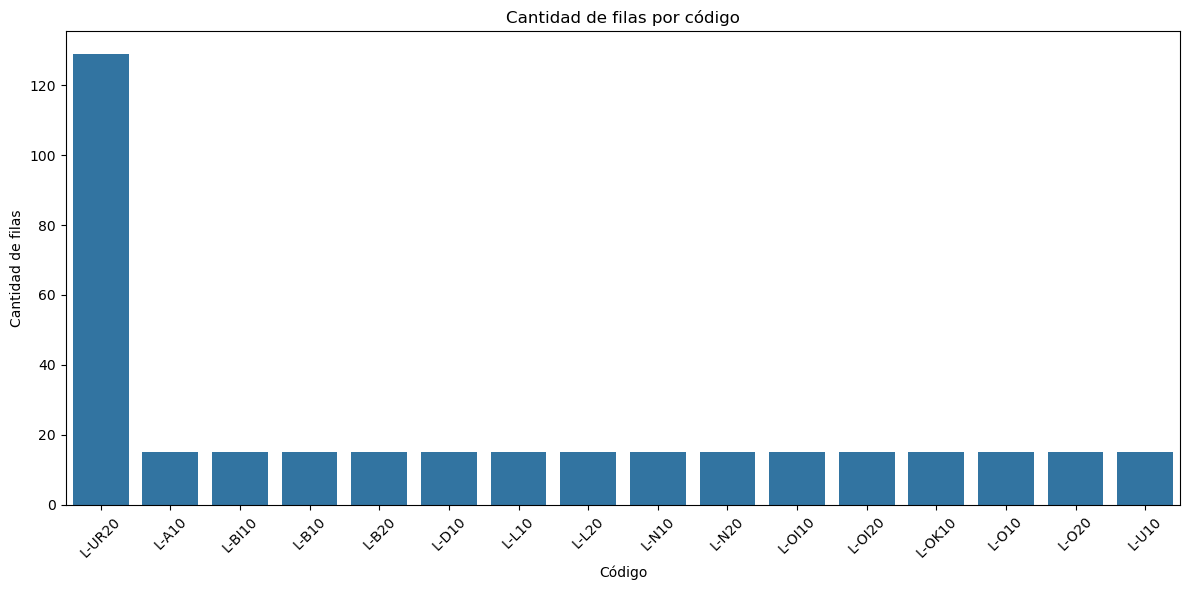

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener el DataFrame combinado
if 'combined_df' in locals():
    plt.figure(figsize=(12,6))
    sns.countplot(data=combined_df, x='code', order=combined_df['code'].value_counts().index)
    plt.title('Cantidad de filas por código')
    plt.xlabel('Código')
    plt.ylabel('Cantidad de filas')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('No hay datos combinados para graficar.')

C:\Users\uagirregomezkorta\AppData\Local\Temp\ipykernel_2756\3567337388.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Código')


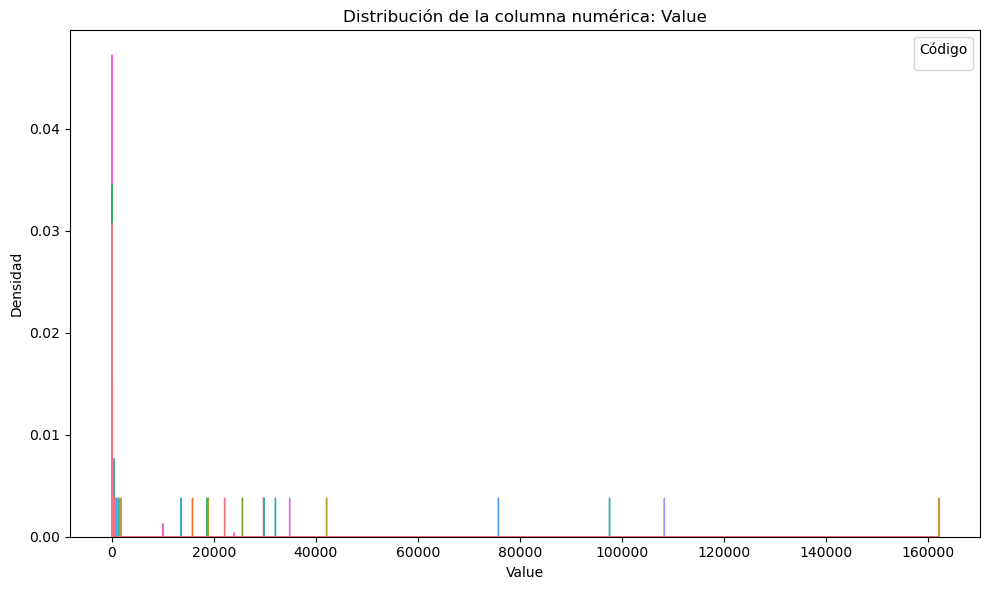

In [23]:
# Histograma de la primera columna numérica para todos los códigos
import numpy as np
num_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
if num_cols:
    col = num_cols[0]
    plt.figure(figsize=(10,6))
    sns.histplot(data=combined_df, x=col, hue='code', element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de la columna numérica: {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend(title='Código')
    plt.tight_layout()
    plt.show()
else:
    print('No se encontraron columnas numéricas para graficar.')

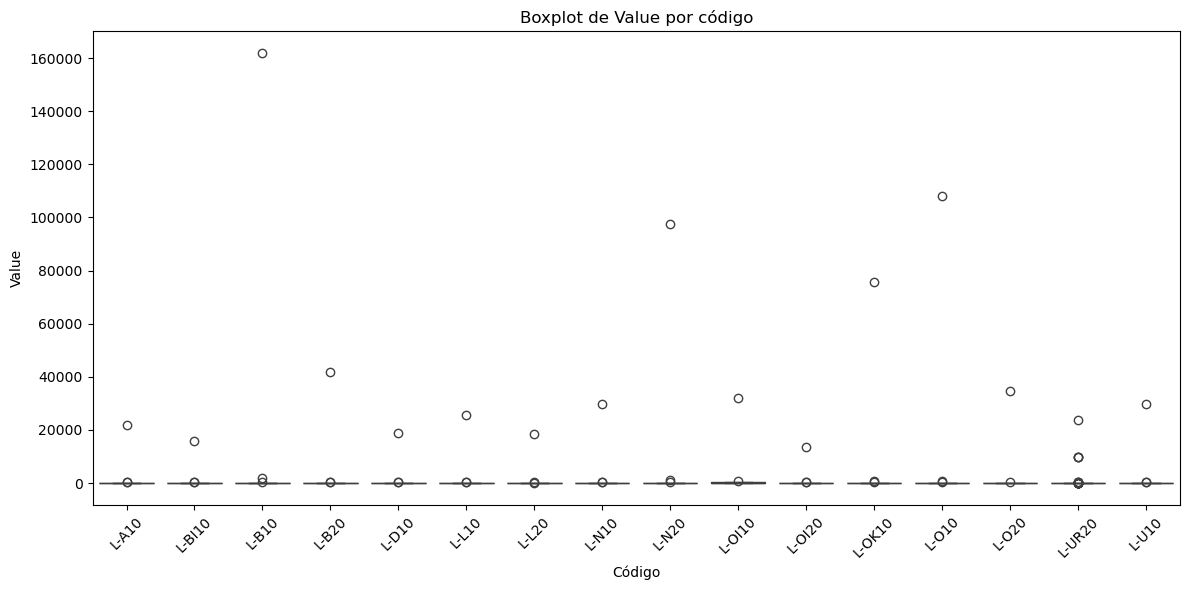

In [24]:
# Boxplot de la primera columna numérica por código
if num_cols:
    col = num_cols[0]
    plt.figure(figsize=(12,6))
    sns.boxplot(data=combined_df, x='code', y=col)
    plt.title(f'Boxplot de {col} por código')
    plt.xlabel('Código')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('No se encontraron columnas numéricas para graficar.')

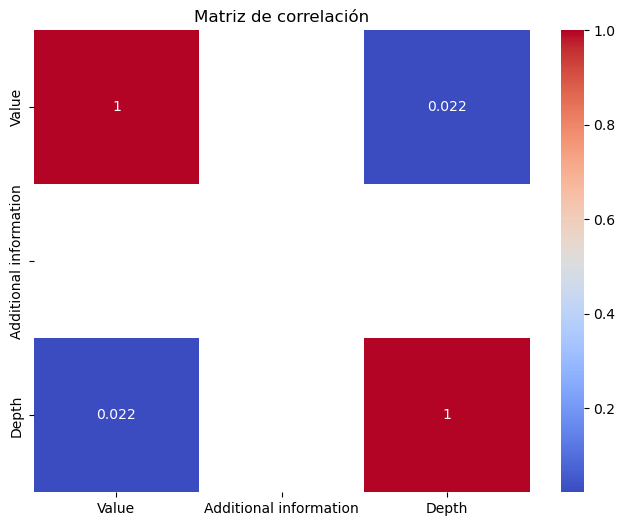

Media de Value por código:
code
L-A10      1525.254000
L-B10     10981.243533
L-B20      2884.241600
L-BI10     1107.620933
L-D10      1317.708400
L-L10      1771.447600
L-L20      1292.876800
L-N10      2039.344933
L-N20      6634.297133
L-O10      7333.406267
L-O20      2369.989200
L-OI10     2262.464200
L-OI20      953.352467
L-OK10     5143.967267
L-U10      2044.872067
L-UR20      435.295546
Name: Value, dtype: float64


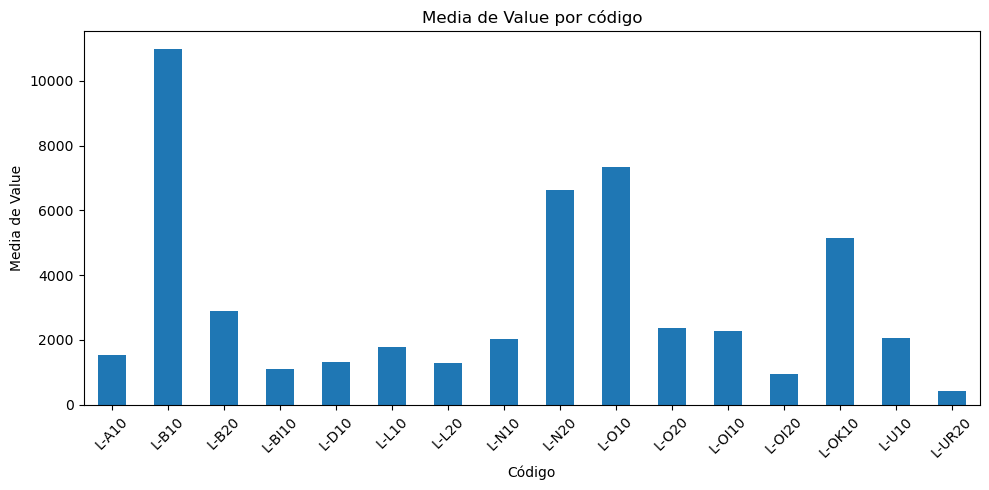

Número de outliers en Value: 55


,Sample Point Code,Date,Hour,Type,Subgroup,Parameter,Species,Operator,Value,Unit,Additional information,Situation,Level,Depth,code
0,L-A10,10/03/2025,10:24,LITORALES,Sedimentos,Potencial Redox,-,=,348.0,mV,NaN,-,-,0,L-A10
6,L-A10,10/03/2025,10:24,LITORALES,Sedimentos,Hierro,-,=,22032.0,mg/kg PS,NaN,-,-,0,L-A10
7,L-A10,10/03/2025,10:24,LITORALES,Sedimentos,Manganeso,-,=,256.0,mg/kg PS,NaN,-,-,0,L-A10
16,L-BI10,06/02/2025,10:35,LITORALES,Sedimentos,Manganeso,-,=,260.0,mg/kg PS,NaN,-,-,0,L-BI10
27,L-BI10,06/02/2025,10:35,LITORALES,Sedimentos,Potencial Redox,-,=,356.0,mV,NaN,-,-,0,L-BI10


In [25]:
# Análisis adicionales sobre combined_df
if 'combined_df' in locals():
    # 1. Matriz de correlación para columnas numéricas
    import numpy as np
    num_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
    if len(num_cols) > 1:
        corr = combined_df[num_cols].corr()
        plt.figure(figsize=(8,6))
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title('Matriz de correlación')
        plt.show()
    else:
        print('No hay suficientes columnas numéricas para matriz de correlación.')

    # 2. Medias por código para la primera columna numérica
    if num_cols:
        col = num_cols[0]
        mean_by_code = combined_df.groupby('code')[col].mean()
        print('Media de', col, 'por código:')
        print(mean_by_code)
        mean_by_code.plot(kind='bar', figsize=(10,5), title=f'Media de {col} por código')
        plt.ylabel(f'Media de {col}')
        plt.xlabel('Código')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    # 3. Detección simple de outliers usando IQR para la primera columna numérica
    if num_cols:
        Q1 = combined_df[col].quantile(0.25)
        Q3 = combined_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = combined_df[(combined_df[col] < Q1 - 1.5 * IQR) | (combined_df[col] > Q3 + 1.5 * IQR)]
        print(f'Número de outliers en {col}:', len(outliers))
        if not outliers.empty:
            display(outliers.head())
else:
    print('No hay datos combinados para análisis.')

In [26]:
# Más análisis sobre combined_df
if 'combined_df' in locals():
    # 1. Conteo de valores nulos por columna
    print('Valores nulos por columna:')
    print(combined_df.isnull().sum())
    print('\n')
    
    # 2. Resumen de columnas categóricas (primeras 3 columnas tipo object)
    cat_cols = combined_df.select_dtypes(include='object').columns.tolist()
    for col in cat_cols[:3]:
        print(f'Valores únicos en {col}:', combined_df[col].nunique())
        print(combined_df[col].value_counts().head())
        print('\n')
    
    # 3. Percentiles de la primera columna numérica por código
    import numpy as np
    num_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
    if num_cols:
        col = num_cols[0]
        percentiles = combined_df.groupby('code')[col].quantile([0.25, 0.5, 0.75]).unstack()
        print(f'Percentiles (25%, 50%, 75%) de {col} por código:')
        print(percentiles)
else:
    print('No hay datos combinados para análisis.')

Valores nulos por columna:
Sample Point Code           0
Date                        0
Hour                        0
Type                        0
Subgroup                    0
Parameter                   0
Species                     0
Operator                    0
Value                       0
Unit                        0
Additional information    354
Situation                   0
Level                       0
Depth                       0
code                        0
dtype: int64


Valores únicos en Sample Point Code: 16
Sample Point Code
L-UR20    129
L-A10      15
L-BI10     15
L-B10      15
L-B20      15
Name: count, dtype: int64


Valores únicos en Date: 5
Date
10/03/2025    120
10/01/2025     66
11/03/2025     60
20/02/2025     57
06/02/2025     51
Name: count, dtype: int64


Valores únicos en Hour: 18
Hour
8:14     66
10:28    57
10:24    15
10:35    15
8:52     15
Name: count, dtype: int64


Percentiles (25%, 50%, 75%) de Value por código:
          0.25    0.50     0.75
co

C:\Users\uagirregomezkorta\AppData\Local\Temp\ipykernel_2756\2017717691.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Código')


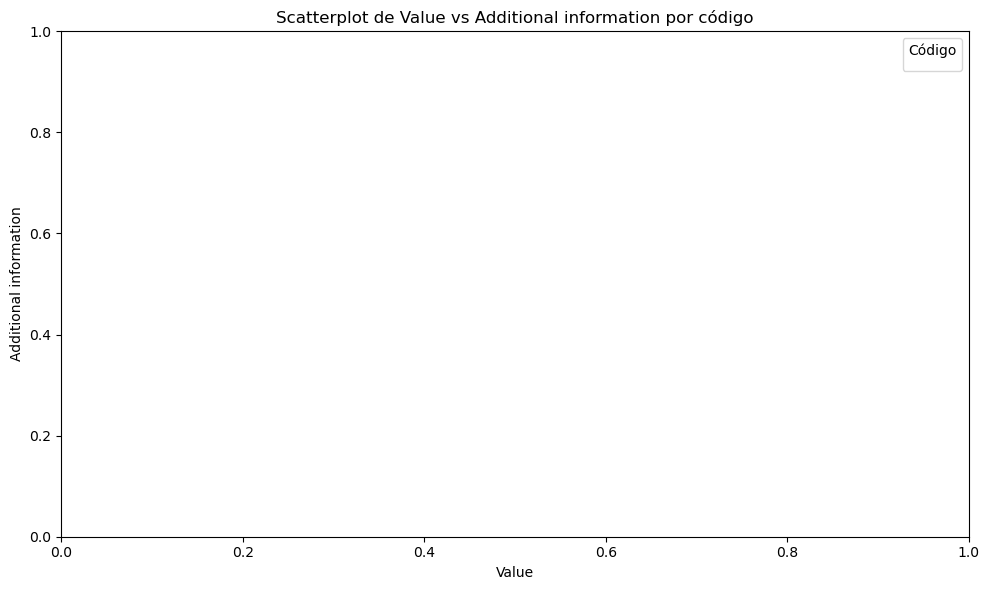

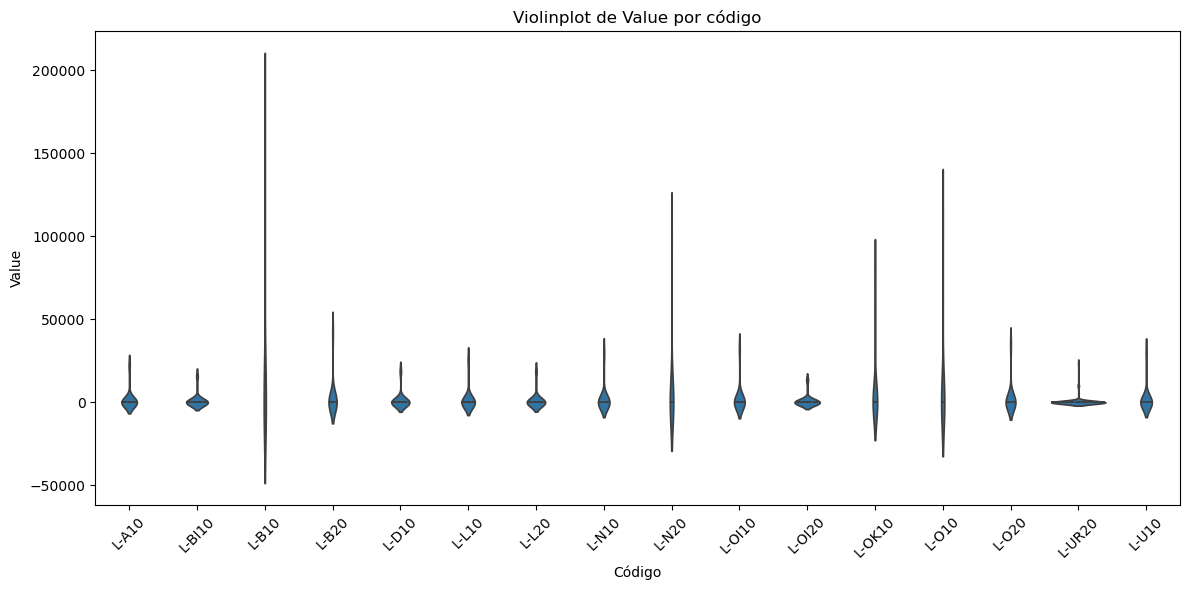

In [27]:
# Gráficos adicionales sobre combined_df
if 'combined_df' in locals():
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    num_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
    if len(num_cols) > 1:
        col1, col2 = num_cols[0], num_cols[1]
        # Scatterplot entre las dos primeras columnas numéricas
        plt.figure(figsize=(10,6))
        sns.scatterplot(data=combined_df, x=col1, y=col2, hue='code', alpha=0.7)
        plt.title(f'Scatterplot de {col1} vs {col2} por código')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend(title='Código')
        plt.tight_layout()
        plt.show()
    else:
        print('No hay suficientes columnas numéricas para scatterplot.')

    # Violinplot de la primera columna numérica por código
    if num_cols:
        col = num_cols[0]
        plt.figure(figsize=(12,6))
        sns.violinplot(data=combined_df, x='code', y=col, inner='quartile')
        plt.title(f'Violinplot de {col} por código')
        plt.xlabel('Código')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print('No hay datos combinados para graficar.')

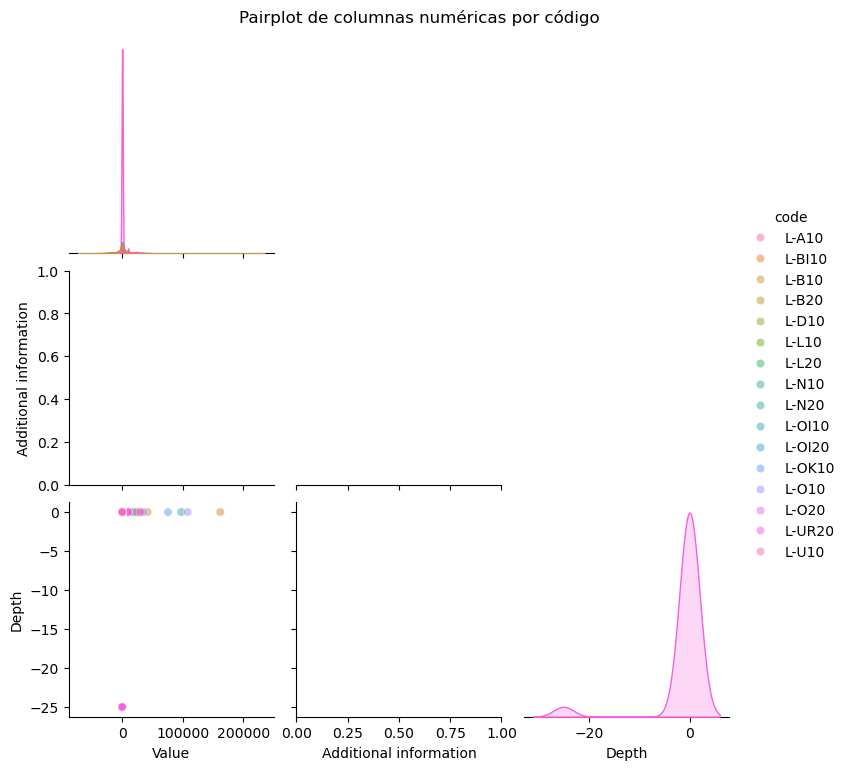

Media de Additional information por código:
code
L-A10    NaN
L-B10    NaN
L-B20    NaN
L-BI10   NaN
L-D10    NaN
L-L10    NaN
L-L20    NaN
L-N10    NaN
L-N20    NaN
L-O10    NaN
L-O20    NaN
L-OI10   NaN
L-OI20   NaN
L-OK10   NaN
L-U10    NaN
L-UR20   NaN
Name: Additional information, dtype: float64


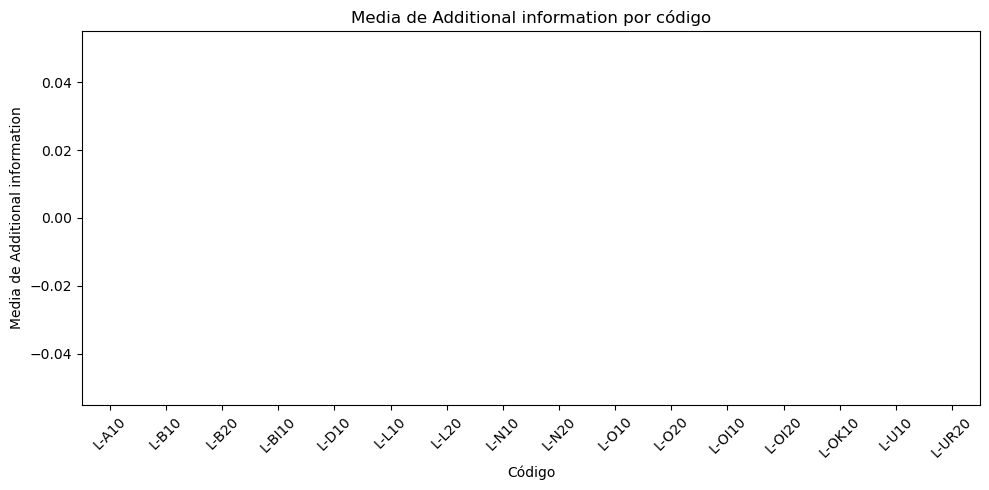

In [28]:
# Más gráficos: pairplot y medias de la segunda columna numérica por código
if 'combined_df' in locals():
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    num_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
    # Pairplot para las primeras 3 columnas numéricas (si existen)
    if len(num_cols) > 1:
        plot_cols = num_cols[:3] if len(num_cols) > 2 else num_cols
        sns.pairplot(combined_df, vars=plot_cols, hue='code', corner=True, plot_kws={'alpha':0.5})
        plt.suptitle('Pairplot de columnas numéricas por código', y=1.02)
        plt.show()
    else:
        print('No hay suficientes columnas numéricas para pairplot.')

    # Gráfico de barras de la media de la segunda columna numérica por código
    if len(num_cols) > 1:
        col2 = num_cols[1]
        mean_by_code2 = combined_df.groupby('code')[col2].mean()
        print('Media de', col2, 'por código:')
        print(mean_by_code2)
        mean_by_code2.plot(kind='bar', figsize=(10,5), title=f'Media de {col2} por código', color='orange')
        plt.ylabel(f'Media de {col2}')
        plt.xlabel('Código')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print('No hay datos combinados para graficar.')

In [20]:
import pandas as pd

# Lista para almacenar los DataFrames de cada código
all_code_dfs = []

for code in df['Code'].unique():
    csv_filename = f"{code.lower()}_measure_fq.csv"
    csv_path = os.path.join(csv_folder, csv_filename)
    if os.path.exists(csv_path):
        code_df = pd.read_csv(csv_path, encoding='latin1', sep=';', on_bad_lines='skip')
        code_df['code'] = code  # Añade la columna de código para identificar el origen
        all_code_dfs.append(code_df)

# Unir todos los DataFrames en uno solo
if all_code_dfs:
    combined_df = pd.concat(all_code_dfs, ignore_index=True)
    print(combined_df.info())
    print(combined_df.describe())
    # Ejemplo: contar filas por código
    print(combined_df['code'].value_counts())
else:
    print("No se cargó ningún archivo CSV de códigos.")
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample Point Code       354 non-null    object 
 1   Date                    354 non-null    object 
 2   Hour                    354 non-null    object 
 3   Type                    354 non-null    object 
 4   Subgroup                354 non-null    object 
 5   Parameter               354 non-null    object 
 6   Species                 354 non-null    object 
 7   Operator                354 non-null    object 
 8   Value                   354 non-null    float64
 9   Unit                    354 non-null    object 
 10  Additional information  0 non-null      float64
 11  Situation               354 non-null    object 
 12  Level                   354 non-null    object 
 13  Depth                   354 non-null    int64  
 14  code                    354 non-null    ob

In [21]:
combined_df.head()

,Sample Point Code,Date,Hour,Type,Subgroup,Parameter,Species,Operator,Value,Unit,Additional information,Situation,Level,Depth,code
0,L-A10,10/03/2025,10:24,LITORALES,Sedimentos,Potencial Redox,-,=,348.00,mV,NaN,-,-,0,L-A10
1,L-A10,10/03/2025,10:24,LITORALES,Sedimentos,% Humedad,-,=,23.62,%,NaN,-,-,0,L-A10
2,L-A10,10/03/2025,10:24,LITORALES,Sedimentos,Níquel,-,=,11.00,mg/kg PS,NaN,-,-,0,L-A10
3,L-A10,10/03/2025,10:24,LITORALES,Sedimentos,Zinc,-,=,63.00,mg/kg PS,NaN,-,-,0,L-A10
4,L-A10,10/03/2025,10:24,LITORALES,Sedimentos,Cromo,-,=,14.00,mg/kg PS,NaN,-,-,0,L-A10
